In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [5]:
df = pd.read_csv('cleaned_laptop_price_data.csv')  # use your file name
df.head()


,laptop_id,manufacturers_info,product,laptop_type,inches,screen_resolution,device_processor (CPU),device_memory (RAM),memory_capacity,gpu,operating_system,weight,price_euros
0,1,1,300,4,13.3,23,65,8,4,58,8,38,1339.69
1,2,1,301,4,13.3,1,63,8,2,51,8,35,898.94
2,3,7,50,3,15.6,8,74,8,16,53,4,74,575.00
3,4,1,300,4,15.4,25,85,1,29,9,8,71,2537.45
4,5,1,300,4,13.3,23,67,8,16,59,8,38,1803.60


In [6]:
df.dtypes


,0
laptop_id,int64
manufacturers_info,int64
product,int64
laptop_type,int64
inches,float64
screen_resolution,int64
device_processor (CPU),int64
device_memory (RAM),int64
memory_capacity,int64
gpu,int64


In [7]:
X = df.drop('price_euros', axis=1)
y = df['price_euros']



In [8]:
X = pd.get_dummies(X)



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)



RMSE: 550.9938067234518


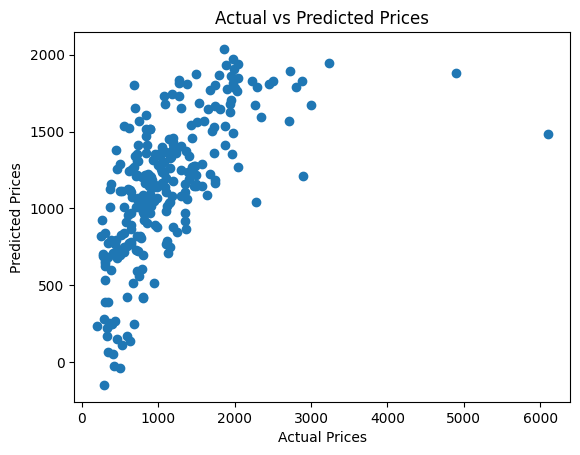

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()



In [23]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8457397953892136


In [18]:
from sklearn.ensemble import RandomForestRegressor



In [19]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [20]:
y_pred = rf_model.predict(X_test)


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)



RMSE: 279.9157902617187
R² Score: 0.8457397953892136


In [25]:
!pip install xgboost


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [27]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_pred = xgb_model.predict(X_test)



In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)



RMSE: 281.2995862731451
R² Score: 0.8442108191264441


In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define model
xgb = XGBRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_root_mean_squared_error', verbose=1)

# Fit
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [32]:
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Tuned RMSE:", rmse)
print("Tuned R² Score:", r2)



Tuned RMSE: 257.6736106808119
Tuned R² Score: 0.8692809168182134


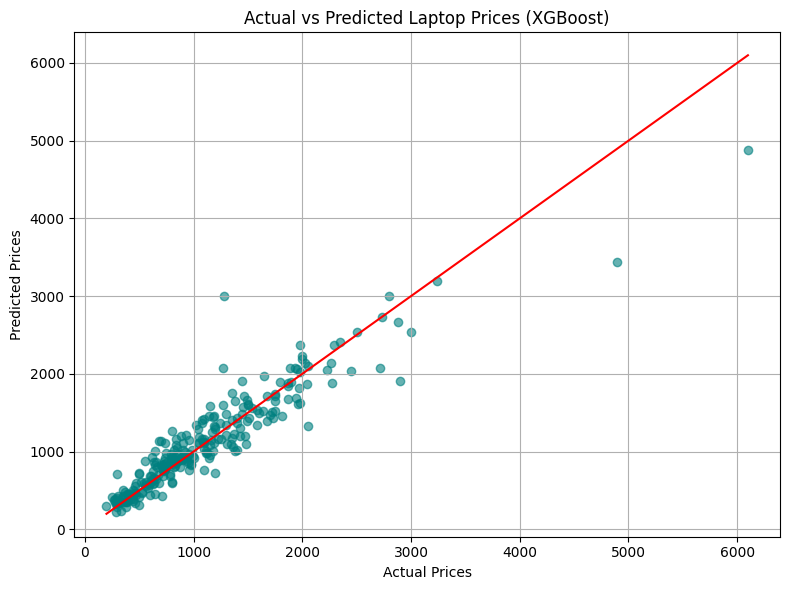

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line of perfect prediction
plt.grid(True)
plt.tight_layout()
plt.show()



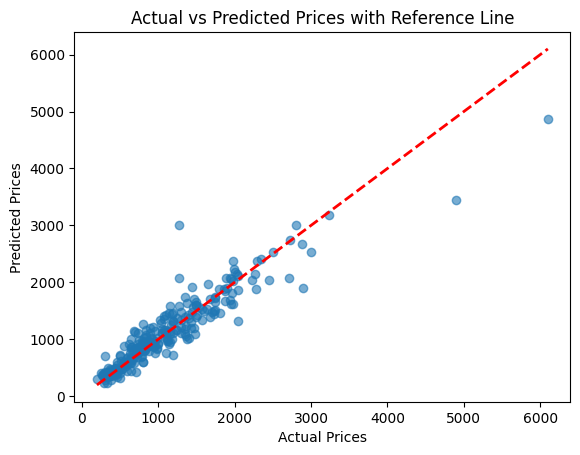

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices with Reference Line")
plt.show()



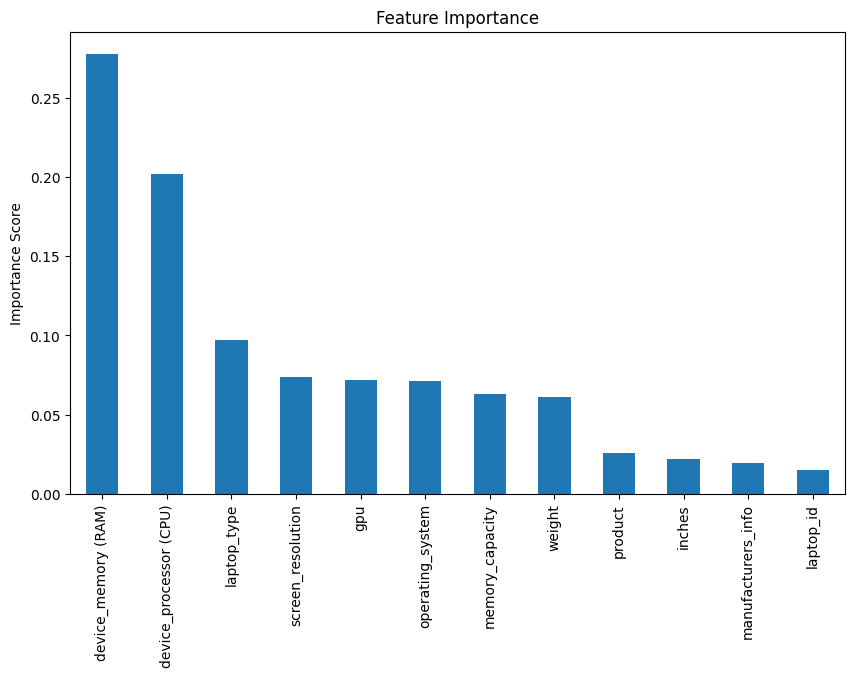

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = best_model.feature_importances_

# Create a pandas series for easier plotting
feature_importance_series = pd.Series(importances, index=X_train.columns)

# Sort by importance
feature_importance_series = feature_importance_series.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feature_importance_series.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()

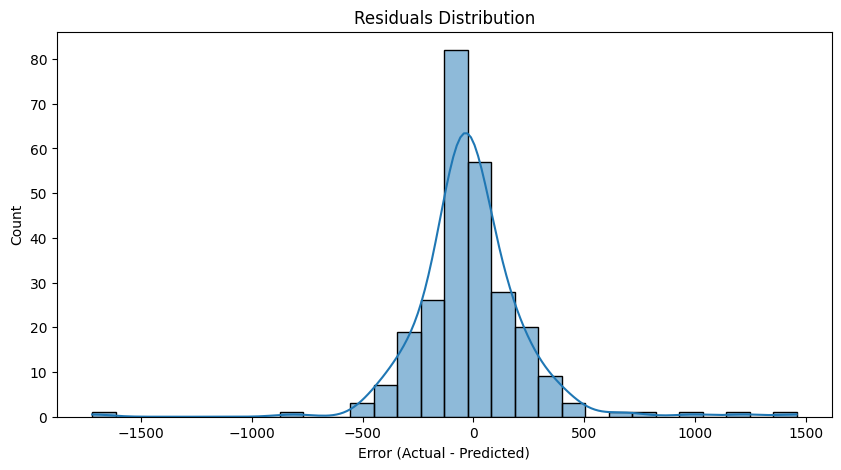

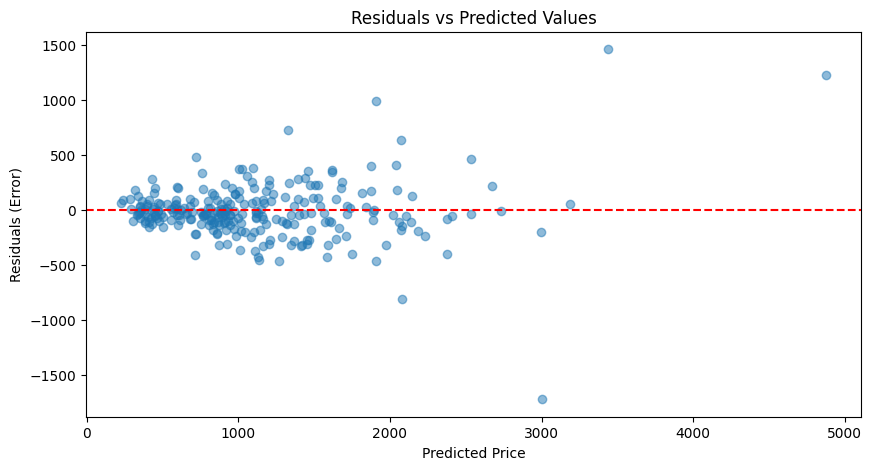

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals histogram
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Error (Actual - Predicted)')
plt.show()

# Residuals vs Predicted values scatter plot
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Error)')
plt.show()

In [45]:
import joblib

joblib.dump(best_model, 'xgb_model.pkl')



['xgb_model.pkl']

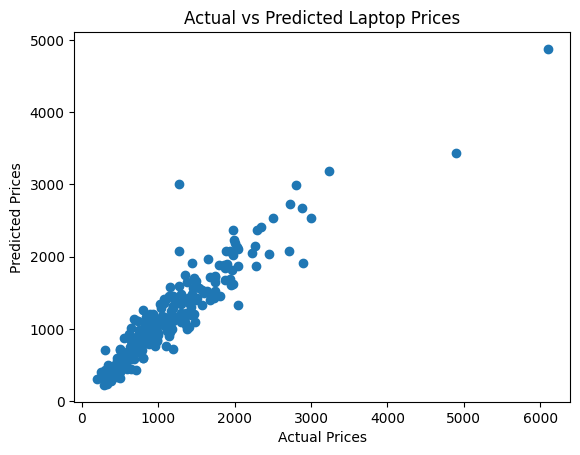

In [47]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Laptop Prices')

# Save the plot to a file in Colab's virtual environment
plt.savefig('actual_vs_predicted.png')

plt.show()

In [48]:
from google.colab import files
files.download('actual_vs_predicted.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

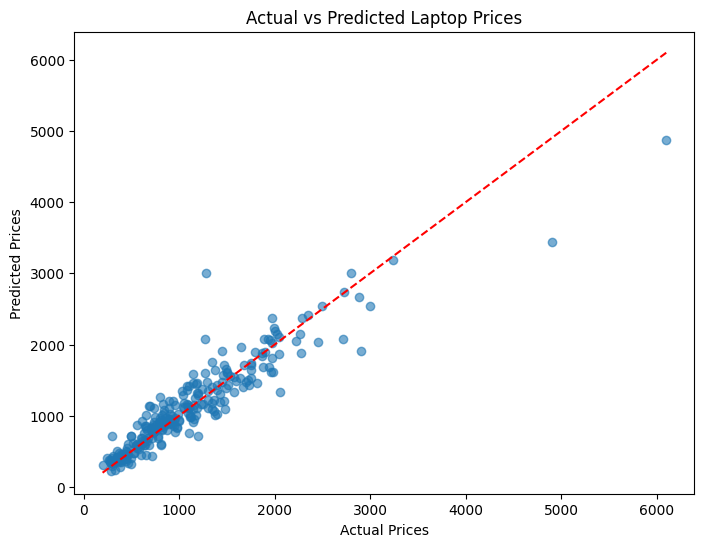

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np



plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Red diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Laptop Prices')

plt.savefig('actual_vs_predicted.png')  # Save the figure

plt.show()

files.download('actual_vs_predicted.png')  # Download the saved image



In [52]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [54]:
import os

# Define the folder path
folder_path = '/content/drive/MyDrive/Data Model Building'

In [56]:
import os
import joblib

# Define the folder path
folder_path = '/content/drive/MyDrive/Data Model Building'

# Create the directory if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the model
joblib.dump(xgb_model, os.path.join(folder_path, 'xgb_model.pkl'))

['/content/drive/MyDrive/Data Model Building/xgb_model.pkl']

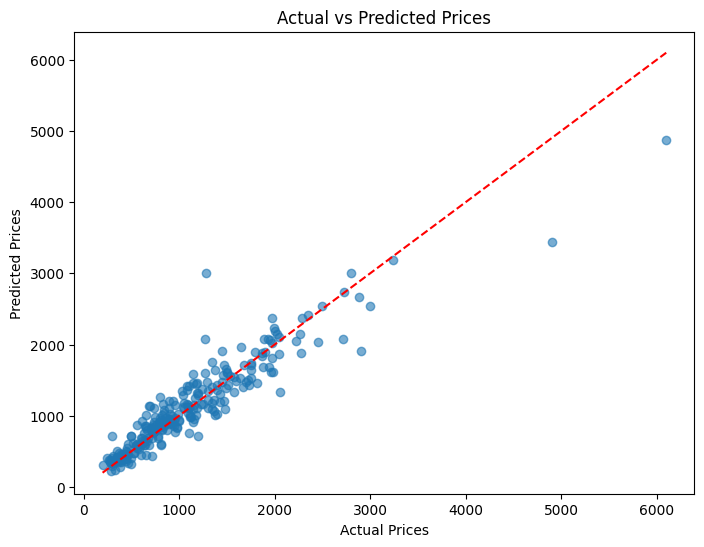

In [58]:
import matplotlib.pyplot as plt
import os

# Define the folder path (same as before)
folder_path = '/content/drive/MyDrive/Data Model Building'

# Make sure folder exists
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Your plot code here (example)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6) # Use y_test and y_pred
min_val = min(y_test)
max_val = max(y_test)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')  # diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Save plot as PNG in the folder
plot_path = os.path.join(folder_path, 'actual_vs_predicted.png')
plt.savefig(plot_path)

plt.show()

Model Building Summary (Colab Session)

Steps Taken:

- Mounted Google Drive to access and save files.
- Loaded Cleaned Data: cleaned_laptop_price_data.csv
- Encoded Categorical Variables using Label Encoding (no binary encoding used).
- Explored and Visualized Data using:
  - Correlation heatmap
  - Diagonal plot (Actual vs Predicted)
  - Residual error plots
  - Feature importance plot from XGBoost
- Tried Multiple Regression Models:
  - Linear Regression
  - Random Forest Regressor
  - XGBoost Regressor
- Tuned Hyperparameters for XGBoost to improve performance.
- Evaluated Models using R² score, residual plots, and prediction scatter plots.
- Identified Influential Features using feature importance plot.
- Saved the Best Model (xgb_model.pkl) to:
  MyDrive/Data Model Building/
- Saved Visualizations (e.g., diagonal plot) as .png files to the same Drive folder.

Final Model:
- Model: XGBoost Regressor (tuned)
- Filename: xgb_model.pkl
- Stored In: Google Drive → Data Model Building


